# Статистическая проверка критериев

## 1. Основная часть

## 1.1. Чтение данных

In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, spearmanr, shapiro, kruskal, norm, gamma, kstest

df = pd.read_csv('stat2.csv', sep=';', decimal=',')
df['R&D personnel'] = df['R&D personnel'].astype('int64')
df.head(10)

,Region,R&D costs,R&D personnel
0,TR10,109071.70,125911
1,TR21,6860.73,7742
2,TR22,3145.15,4900
3,TR31,16881.76,22590
4,TR32,4437.94,7365
5,TR33,7906.48,9029
6,TR41,20048.46,21215
7,TR42,40018.67,32197
8,TR51,112200.72,77080
9,TR52,5842.09,8852


## 1.2. Визуализация

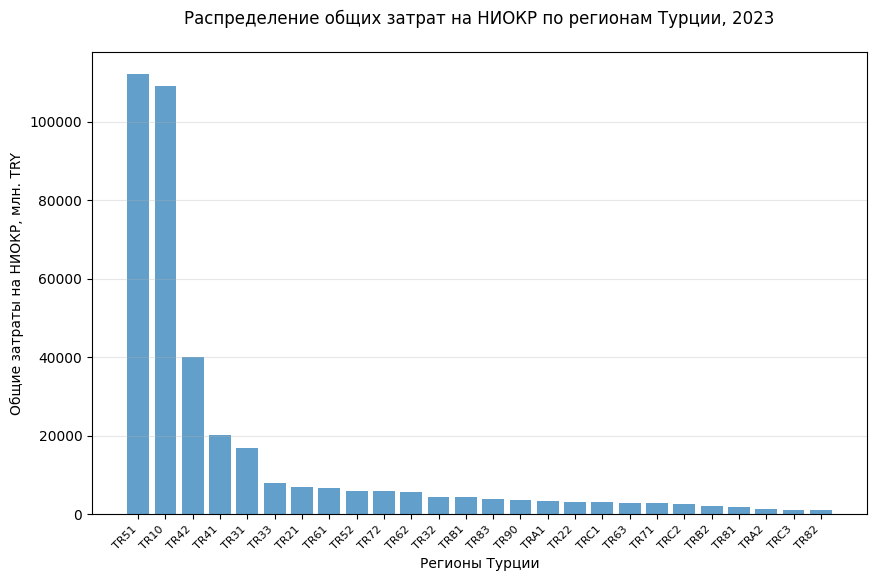

In [2]:
sorted_df = df.copy().sort_values('R&D costs', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(sorted_df)), sorted_df['R&D costs'], alpha=0.7)
plt.xticks(range(len(sorted_df)), sorted_df['Region'], fontsize=8, rotation=45, ha='right')
plt.ylabel('Общие затраты на НИОКР, млн. TRY', fontsize=10)
plt.xlabel('Регионы Турции', fontsize=10)
plt.title('Распределение общих затрат на НИОКР по регионам Турции, 2023', fontsize=12, pad=20)
plt.grid(axis='y', alpha=0.3)
plt.show()

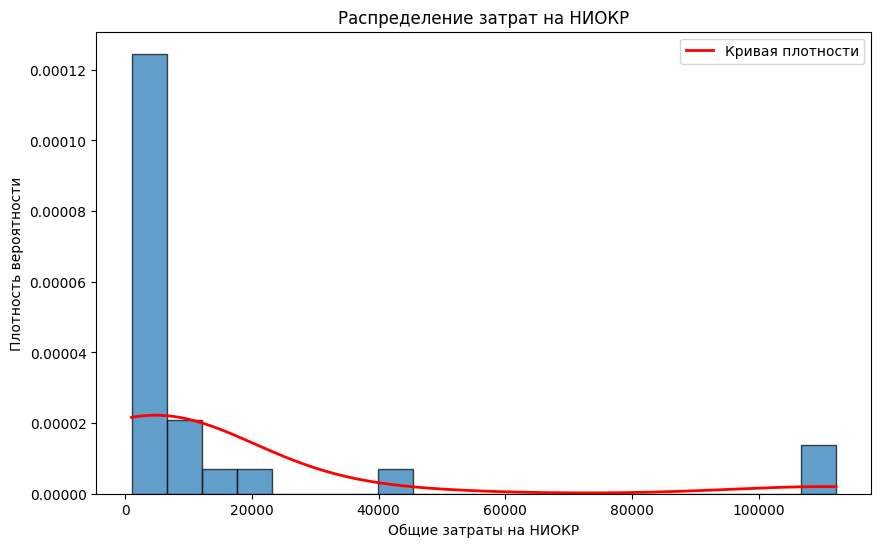

In [3]:
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df['R&D costs'], bins=20, alpha=0.7, edgecolor='black', density=True)

density = gaussian_kde(df['R&D costs'])
xs = np.linspace(df['R&D costs'].min(), df['R&D costs'].max(), 200)
plt.plot(xs, density(xs), 'r-', linewidth=2, label='Кривая плотности')

plt.xlabel('Общие затраты на НИОКР')
plt.ylabel('Плотность вероятности')
plt.title('Распределение затрат на НИОКР')
plt.legend()
plt.show()

## 1.3. Проверка критериев

In [4]:
# Коэффициент вариации
def cv_test_exponential(data):    
    cv = np.std(data) / np.mean(data)
    n = len(data)
    se_cv = np.sqrt((1 + 2 * cv**2) / n)
    
    z_stat = (cv - 1) / se_cv
    p_value = 2 * (1 - norm.cdf(abs(z_stat)))
    
    print(f"Коэффициент вариации: {cv:.4f}")
    print(f"p-value: {p_value:.4f}")
    
cv_test_exponential(df['R&D costs'])

Коэффициент вариации: 1.9883
p-value: 0.0913


In [5]:
# Тест Шапиро-Уилка
def test_shapiro(data):
    log_data = np.log(data)
    shapiro_stat, p_value = shapiro(log_data)
    print(f"Затраты на R&D: W={shapiro_stat:.4f}, p-value={p_value:.4f}")
test_shapiro(df['R&D costs'])

Затраты на R&D: W=0.8858, p-value=0.0077


In [6]:
# Критерий Спирмена
corr_coef, p_value = spearmanr(df['R&D costs'], df['R&D personnel'])
print(f"coef: {corr_coef:.4f}")
print(f"p-val: {p_value}")

coef: 0.9740
p-val: 5.474066064567506e-17


In [7]:
# Параметры гамма-распределения
def test_ks_gamma(data):
    shape, loc, scale = gamma.fit(data)
    ks_stat, p_value = kstest(data, 'gamma', args=(shape, loc, scale))
    
    print(f"Параметры гамма-распределения:")
    print(f"shape (alpha) = {shape:.4f}")
    print(f"loc = {loc:.4f}") 
    print(f"scale (beta) = {scale:.4f}")
    print(f"K-S статистика: {ks_stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    
test_ks_gamma(df['R&D costs'])

Параметры гамма-распределения:
shape (alpha) = 0.3820
loc = 1018.4400
scale (beta) = 48306.1715
K-S статистика: 0.2931
P-value: 0.0179


## 2. Дополнительная часть

In [8]:
gdp_df = pd.read_csv('stat2_gdp.csv', sep=';', decimal=',')
df.head(10)

,Region,R&D costs,R&D personnel
0,TR10,109071.70,125911
1,TR21,6860.73,7742
2,TR22,3145.15,4900
3,TR31,16881.76,22590
4,TR32,4437.94,7365
5,TR33,7906.48,9029
6,TR41,20048.46,21215
7,TR42,40018.67,32197
8,TR51,112200.72,77080
9,TR52,5842.09,8852


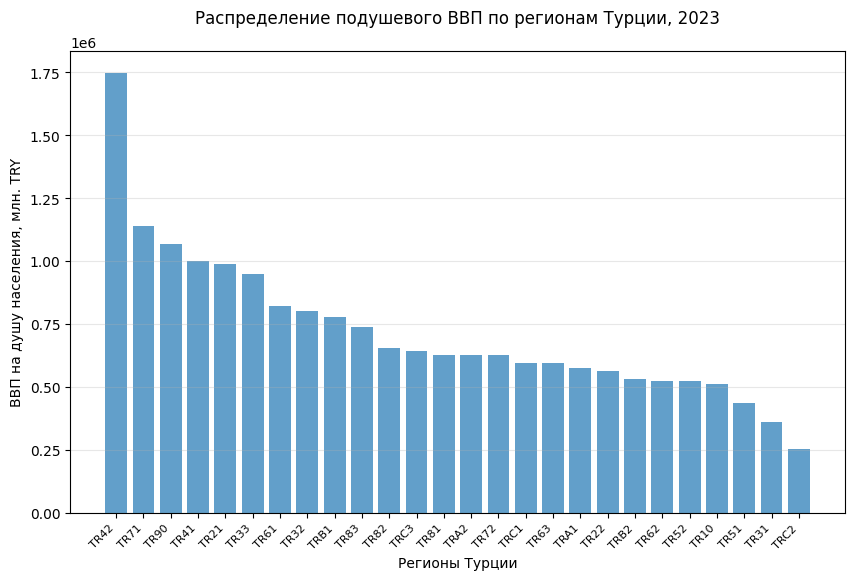

In [9]:
# Визуализация данных
sorted_df = gdp_df.copy().sort_values('GDP', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(sorted_df)), sorted_df['GDP'], alpha=0.7)
plt.xticks(range(len(sorted_df)), sorted_df['Region'], fontsize=8, rotation=45, ha='right')
plt.ylabel('ВВП на душу населения, млн. TRY', fontsize=10)
plt.xlabel('Регионы Турции', fontsize=10)
plt.title('Распределение подушевого ВВП по регионам Турции, 2023', fontsize=12, pad=20)
plt.grid(axis='y', alpha=0.3)
plt.show()

In [10]:
cv_test_exponential(gdp_df['GDP'])

Коэффициент вариации: 0.4115
p-value: 0.0095


In [11]:
test_shapiro(gdp_df['GDP'])

Затраты на R&D: W=0.9689, p-value=0.5942


In [20]:
corr_coef, p_value = spearmanr(df['R&D costs'], gdp_df['GDP'])
print(f"coef: {corr_coef:.4f}")
print(f"p-val: {p_value:.4f}")

coef: 0.0332
p-val: 0.8722


In [13]:
test_ks_gamma(gdp_df['GDP'])

Параметры гамма-распределения:
shape (alpha) = 1827.3724
loc = -692752.5520
scale (beta) = 696.0665
K-S статистика: 0.5177
P-value: 0.0000


In [18]:
# Критерия Краскела-Уоллиса
north = ['TR21', 'TR22', 'TR10', 'TR41', 'TR42', 'TR81', 'TR82', 'TR83', 'TR90', 'TRA1', 'TRA2']
south = ['TR31', 'TR32', 'TR33', 'TR61', 'TR62', 'TR63', 'TRC1', 'TRC2', 'TRC3', 'TRB2', 'TRB1']

group1 = gdp_df[gdp_df['Region'].isin(north)]['GDP']
group2 = gdp_df[gdp_df['Region'].isin(south)]['GDP']
group3 = gdp_df[~gdp_df['Region'].isin(south + north)]['GDP']

h_stat, p_value = kruskal(group1, group2, group3)
print(f"H-stat={h_stat:.4f}, p-val={p_value:.4f}")

H-stat=2.0532, p-val=0.3582


In [19]:
# Коэффициент Джини
def gini_coefficient(x):
    x = np.sort(x)
    n = len(x)
    
    index = np.arange(1, n + 1)
    gini = (np.sum((2 * index - n - 1) * x)) / (n * np.sum(x))
    return gini

gini_gdp = gini_coefficient(gdp_df['GDP'])
print(f"Gini coef={gini_gdp:.4f}")

Gini coef=0.2094


In [21]:
corr_coef, p_value = spearmanr(df['R&D personnel'], gdp_df['GDP'])
print(f"coef: {corr_coef:.4f}")
print(f"p-val: {p_value}")

coef: 0.0810
p-val: 0.6939649041048016
